## 1. Import Functions and **Data**


In [3]:
# Install NLTK & download required datasets
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import sys
sys.path.append('/content/sample_data')  # ✅ append the directory, NOT the .py file

from utils import process_tweet, build_freqs  # ✅ will now work

from nltk.corpus import twitter_samples

import numpy as np


In [11]:
from nltk.corpus import twitter_samples
from utils import process_tweet, build_freqs
import numpy as np

# Load all 5000 positive and 5000 negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# ✅ Train/Test Split: 80/20 for both classes
train_pos = all_positive_tweets[:4000]
test_pos = all_positive_tweets[4000:]

train_neg = all_negative_tweets[:4000]
test_neg = all_negative_tweets[4000:]

# ✅ Combine
train_x = train_pos + train_neg
test_x = test_pos + test_neg

# Labels: 1 for positive, 0 for negative
train_y = np.append(np.ones((4000, 1)), np.zeros((4000, 1)), axis=0)
test_y = np.append(np.ones((1000, 1)), np.zeros((1000, 1)), axis=0)

# Build frequency dictionary
freqs = build_freqs(train_x, train_y)

print("✅ Training tweets:", len(train_x))
print("✅ Testing tweets:", len(test_x))
print("✅ Training labels:", train_y.shape)
print("✅ Frequency dictionary size:", len(freqs))


✅ Training tweets: 8000
✅ Testing tweets: 2000
✅ Training labels: (8000, 1)
✅ Frequency dictionary size: 11431


# Logistic Regression Functions

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Gradient Descent

In [14]:
def gradientDescent(x, y, theta, alpha, num_iters):
    m = x.shape[0]

    for i in range(num_iters):
        z = np.dot(x, theta)
        h = sigmoid(z)
        J = -1/m * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
        theta -= alpha * (1/m) * np.dot(x.T, (h - y))

    return float(J), theta


In [15]:
def extract_features(tweet, freqs):
    word_l = process_tweet(tweet)
    x = np.zeros((1, 3))
    x[0, 0] = 1  # bias term

    for word in word_l:
        x[0, 1] += freqs.get((word, 1.0), 0)
        x[0, 2] += freqs.get((word, 0.0), 0)

    return x


In [16]:
# Stack features into matrix X
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :] = extract_features(train_x[i], freqs)

Y = train_y

# Train using gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)

print(f"✅ Final cost: {J:.6f}")
print(f"✅ Learned weights: {theta.ravel()}")


✅ Final cost: 0.691649
✅ Learned weights: [-8.84093366e-10  4.05405173e-05 -2.45921744e-05]


<ipython-input-14-ba1e7845acff>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(J), theta


In [17]:
def predict_tweet(tweet, freqs, theta):
    x = extract_features(tweet, freqs)
    y_pred = sigmoid(np.dot(x, theta))
    return y_pred


In [18]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    y_hat = []

    for tweet in test_x:
        y_pred = predict_tweet(tweet, freqs, theta)
        y_hat.append(1.0 if y_pred > 0.5 else 0.0)

    accuracy = np.mean(np.asarray(y_hat) == np.squeeze(test_y))
    return accuracy

# Evaluate
accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"✅ Logistic Regression Accuracy on Test Set: {accuracy:.4f}")


✅ Logistic Regression Accuracy on Test Set: 0.6660


In [19]:
print("❌ Misclassified Tweets (Label / Prediction / Tweet):")
for x, y in zip(test_x, test_y):
    y_hat = predict_tweet(x, freqs, theta)
    if np.abs(y - (y_hat > 0.5)) > 0:
        print(f'Label: {int(y[0])} | Predicted: {y_hat[0][0]:.4f} | Tweet: {x}')


❌ Misclassified Tweets (Label / Prediction / Tweet):
Label: 1 | Predicted: 0.4999 | Tweet: Bro:U wan cut hair anot,ur hair long Liao bo
Me:since ord liao,take it easy lor treat as save $ leave it longer :)
Bro:LOL Sibei xialan
Label: 1 | Predicted: 0.5000 | Tweet: @EllieVond @SkeletonSweets @Justin_Naito @justcallmerizzo No actually, you don't. Bye bye indeed. Go take your drama elsewhere. :)
Label: 1 | Predicted: 0.5000 | Tweet: @charlesjonesss F off :)
Label: 1 | Predicted: 0.5000 | Tweet: @V4Violetta *highfive* You are probably ahead of me there, since I am less artsy than verbal :D
Label: 1 | Predicted: 0.5000 | Tweet: @SeniorSpazz @TehSmileys I was bored so I did EVERYTHING :D
Label: 1 | Predicted: 0.4999 | Tweet: I :)"@Kreizi_: Who wants a #FF S/O??"
Label: 1 | Predicted: 0.5000 | Tweet: http://t.co/t2z9ax4qyd - hey, now! Come see us at the @NTCalkeAbbey Summer Fine Food Fair on Sunday, 11am-4pm in the Riding School :)
Label: 1 | Predicted: 0.5000 | Tweet: you betcha :) dumb butt

In [22]:
my_tweet = "Love love love this! So happy and joyful and excited!"

print("Processed:", process_tweet(my_tweet))

y_hat = predict_tweet(my_tweet, freqs, theta)
print(f"\nProbability: {y_hat[0][0]:.4f}")

if y_hat > 0.5:
    print("✅ Positive sentiment")
else:
    print("❌ Negative sentiment")


Processed: ['love', 'love', 'love', 'happi', 'joy', 'excit']

Probability: 0.5096
✅ Positive sentiment


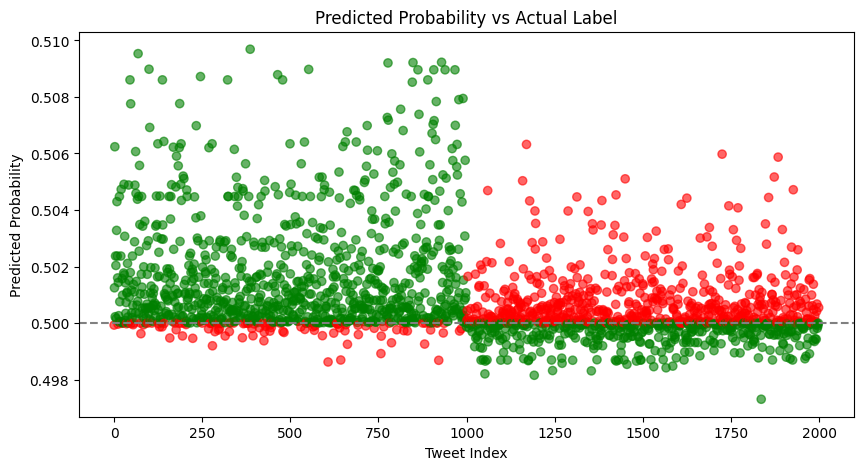

In [23]:
import matplotlib.pyplot as plt

# Collect prediction probabilities and true labels
y_probs = [predict_tweet(tweet, freqs, theta)[0][0] for tweet in test_x]
y_true = test_y.flatten()

# Create scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_probs)), y_probs, c=['green' if round(p) == y else 'red' for p, y in zip(y_probs, y_true)], alpha=0.6)
plt.title('Predicted Probability vs Actual Label')
plt.xlabel('Tweet Index')
plt.ylabel('Predicted Probability')
plt.axhline(0.5, color='gray', linestyle='--')
plt.show()


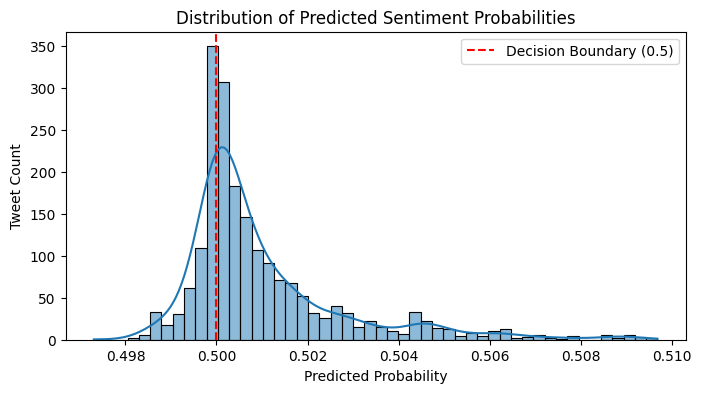

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get probabilities
y_probs = [predict_tweet(tweet, freqs, theta)[0][0] for tweet in test_x]

# Plot distribution
plt.figure(figsize=(8, 4))
sns.histplot(y_probs, bins=50, kde=True)
plt.title("Distribution of Predicted Sentiment Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Tweet Count")
plt.axvline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.legend()
plt.show()


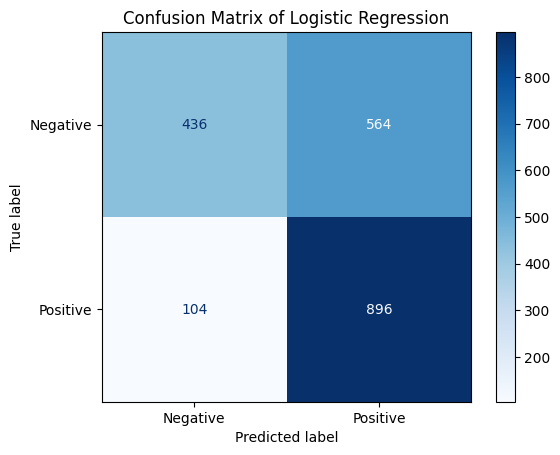

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes (0 or 1)
y_pred = [1 if predict_tweet(tweet, freqs, theta)[0][0] > 0.5 else 0 for tweet in test_x]

# Confusion Matrix
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of Logistic Regression")
plt.show()
